In [225]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob 

In [226]:
dff = pd.read_csv('netflixdataset.zip')

In [227]:
count = 0
for column in dff.columns:
    count = 1 + count
    print(f'{count} :',column)  

1 : show_id
2 : type
3 : title
4 : director
5 : cast
6 : country
7 : date_added
8 : release_year
9 : rating
10 : duration
11 : listed_in
12 : description


In [228]:
dff.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [229]:
p = dff.groupby(['rating']).size().reset_index().rename(columns = {0 :'count'})

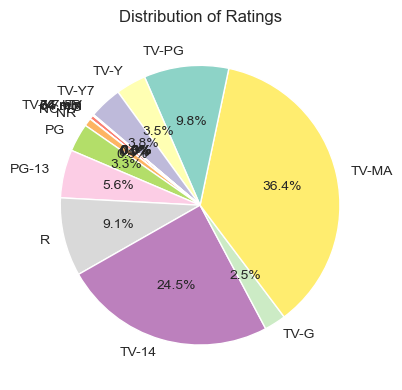

In [230]:
plt.figure(figsize=(6, 4))
plt.title('Distribution of Ratings')
sns.set_palette("Set3")
sns.set_style("whitegrid")
plt.pie(x=p['count'], labels=p['rating'], autopct='%1.1f%%', startangle=140)
plt.tight_layout()
plt.show()

In [231]:
dff['director']=dff['director'].fillna('No Director Specified')

In [232]:
directors = dff.groupby('director').size().reset_index().rename(columns={0:'total_movies'})
directors = directors.sort_values('total_movies',ascending=False)

In [233]:
directors[:5]

,director,total_movies
3051,No Director Specified,2634
3393,Rajiv Chilaka,19
3444,"Raúl Campos, Jan Suter",18
4047,Suhas Kadav,16
2598,Marcus Raboy,16


In [234]:
Top_5_directors = directors[directors['director'] != 'No Director Specified'][0:5]
Top_5_directors

,director,total_movies
3393,Rajiv Chilaka,19
3444,"Raúl Campos, Jan Suter",18
4047,Suhas Kadav,16
2598,Marcus Raboy,16
1790,Jay Karas,14


In [235]:
dff['cast']=dff['cast'].fillna('No Cast Specified')

In [236]:
filtered_cast=dff['cast'].str.split(',',expand=True).stack()

In [237]:
filtered_cast=filtered_cast.to_frame()

In [238]:
filtered_cast.columns = ['actors']

In [239]:
actors = filtered_cast.groupby('actors').size().reset_index().rename(columns={0:'total_movies'})
actors = actors.sort_values('total_movies',ascending=False)

In [240]:
actors = actors[actors['actors'] != 'No Cast Specified']

In [241]:
top_actors = actors[0:5]
top_actors

,actors,total_movies
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27


<AxesSubplot:xlabel='actors', ylabel='total_movies'>

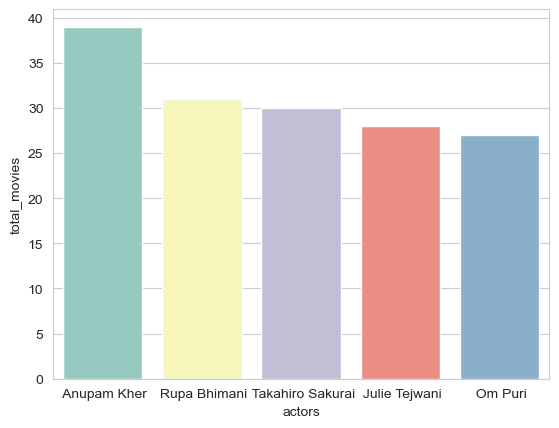

In [242]:
sns.barplot(data=top_actors,x='actors',y='total_movies')

In [243]:
df1 = dff[['type','release_year']]
df2 = df1.groupby(['release_year','type']).size().reset_index(name='Total Content')
df2 = df2[df2['release_year']>=2010]
df2

,release_year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


In [244]:
fig3 = px.line(df2, x="release_year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')

In [245]:
fig3

In [246]:
dfx=dff[['release_year','description']]
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['release_year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['release_year']>=2010]
fig4 = px.bar(dfx, x="release_year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_10468\2293805626.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

